In [1]:
import os
import glob
import subprocess
import numpy as np
import skimage.util
import nibabel as nib 
import matplotlib.pyplot as plt

In [3]:
with open('all_T1s.txt', 'r') as f:
    a = f.read().splitlines()
a.sort()

In [4]:
few_files = a[0:400]

['/nfs2/harmonization/BIDS/ADNI_tmp//sub-0021/ses-adni3baselinescanner011/anat/sub-0021_ses-adni3baselinescanner011_T1w.nii.gz',
 '/nfs2/harmonization/BIDS/ADNI_tmp//sub-0031/ses-adni3baselinescanner023/anat/sub-0031_ses-adni3baselinescanner023_T1w.nii.gz',
 '/nfs2/harmonization/BIDS/ADNI_tmp//sub-0031/ses-adni3year1scanner023/anat/sub-0031_ses-adni3year1scanner023_T1w.nii.gz',
 '/nfs2/harmonization/BIDS/ADNI_tmp//sub-0056/ses-adni3baselinescanner067/anat/sub-0056_ses-adni3baselinescanner067_T1w.nii.gz',
 '/nfs2/harmonization/BIDS/ADNI_tmp//sub-0056/ses-adni3year1scanner067/anat/sub-0056_ses-adni3year1scanner067_T1w.nii.gz',
 '/nfs2/harmonization/BIDS/ADNI_tmp//sub-0056/ses-adni3year2scanner067/anat/sub-0056_ses-adni3year2scanner067_T1w.nii.gz',
 '/nfs2/harmonization/BIDS/ADNI_tmp//sub-0059/ses-adni3baselinescanner067/anat/sub-0059_ses-adni3baselinescanner067_T1w.nii.gz',
 '/nfs2/harmonization/BIDS/ADNI_tmp//sub-0059/ses-adni3year2scanner067/anat/sub-0059_ses-adni3year2scanner067_T1w.n

In [15]:
image = nib.load(few_files[1]).get_fdata()

In [28]:
np.int32(image.shape[2] / 2)

128

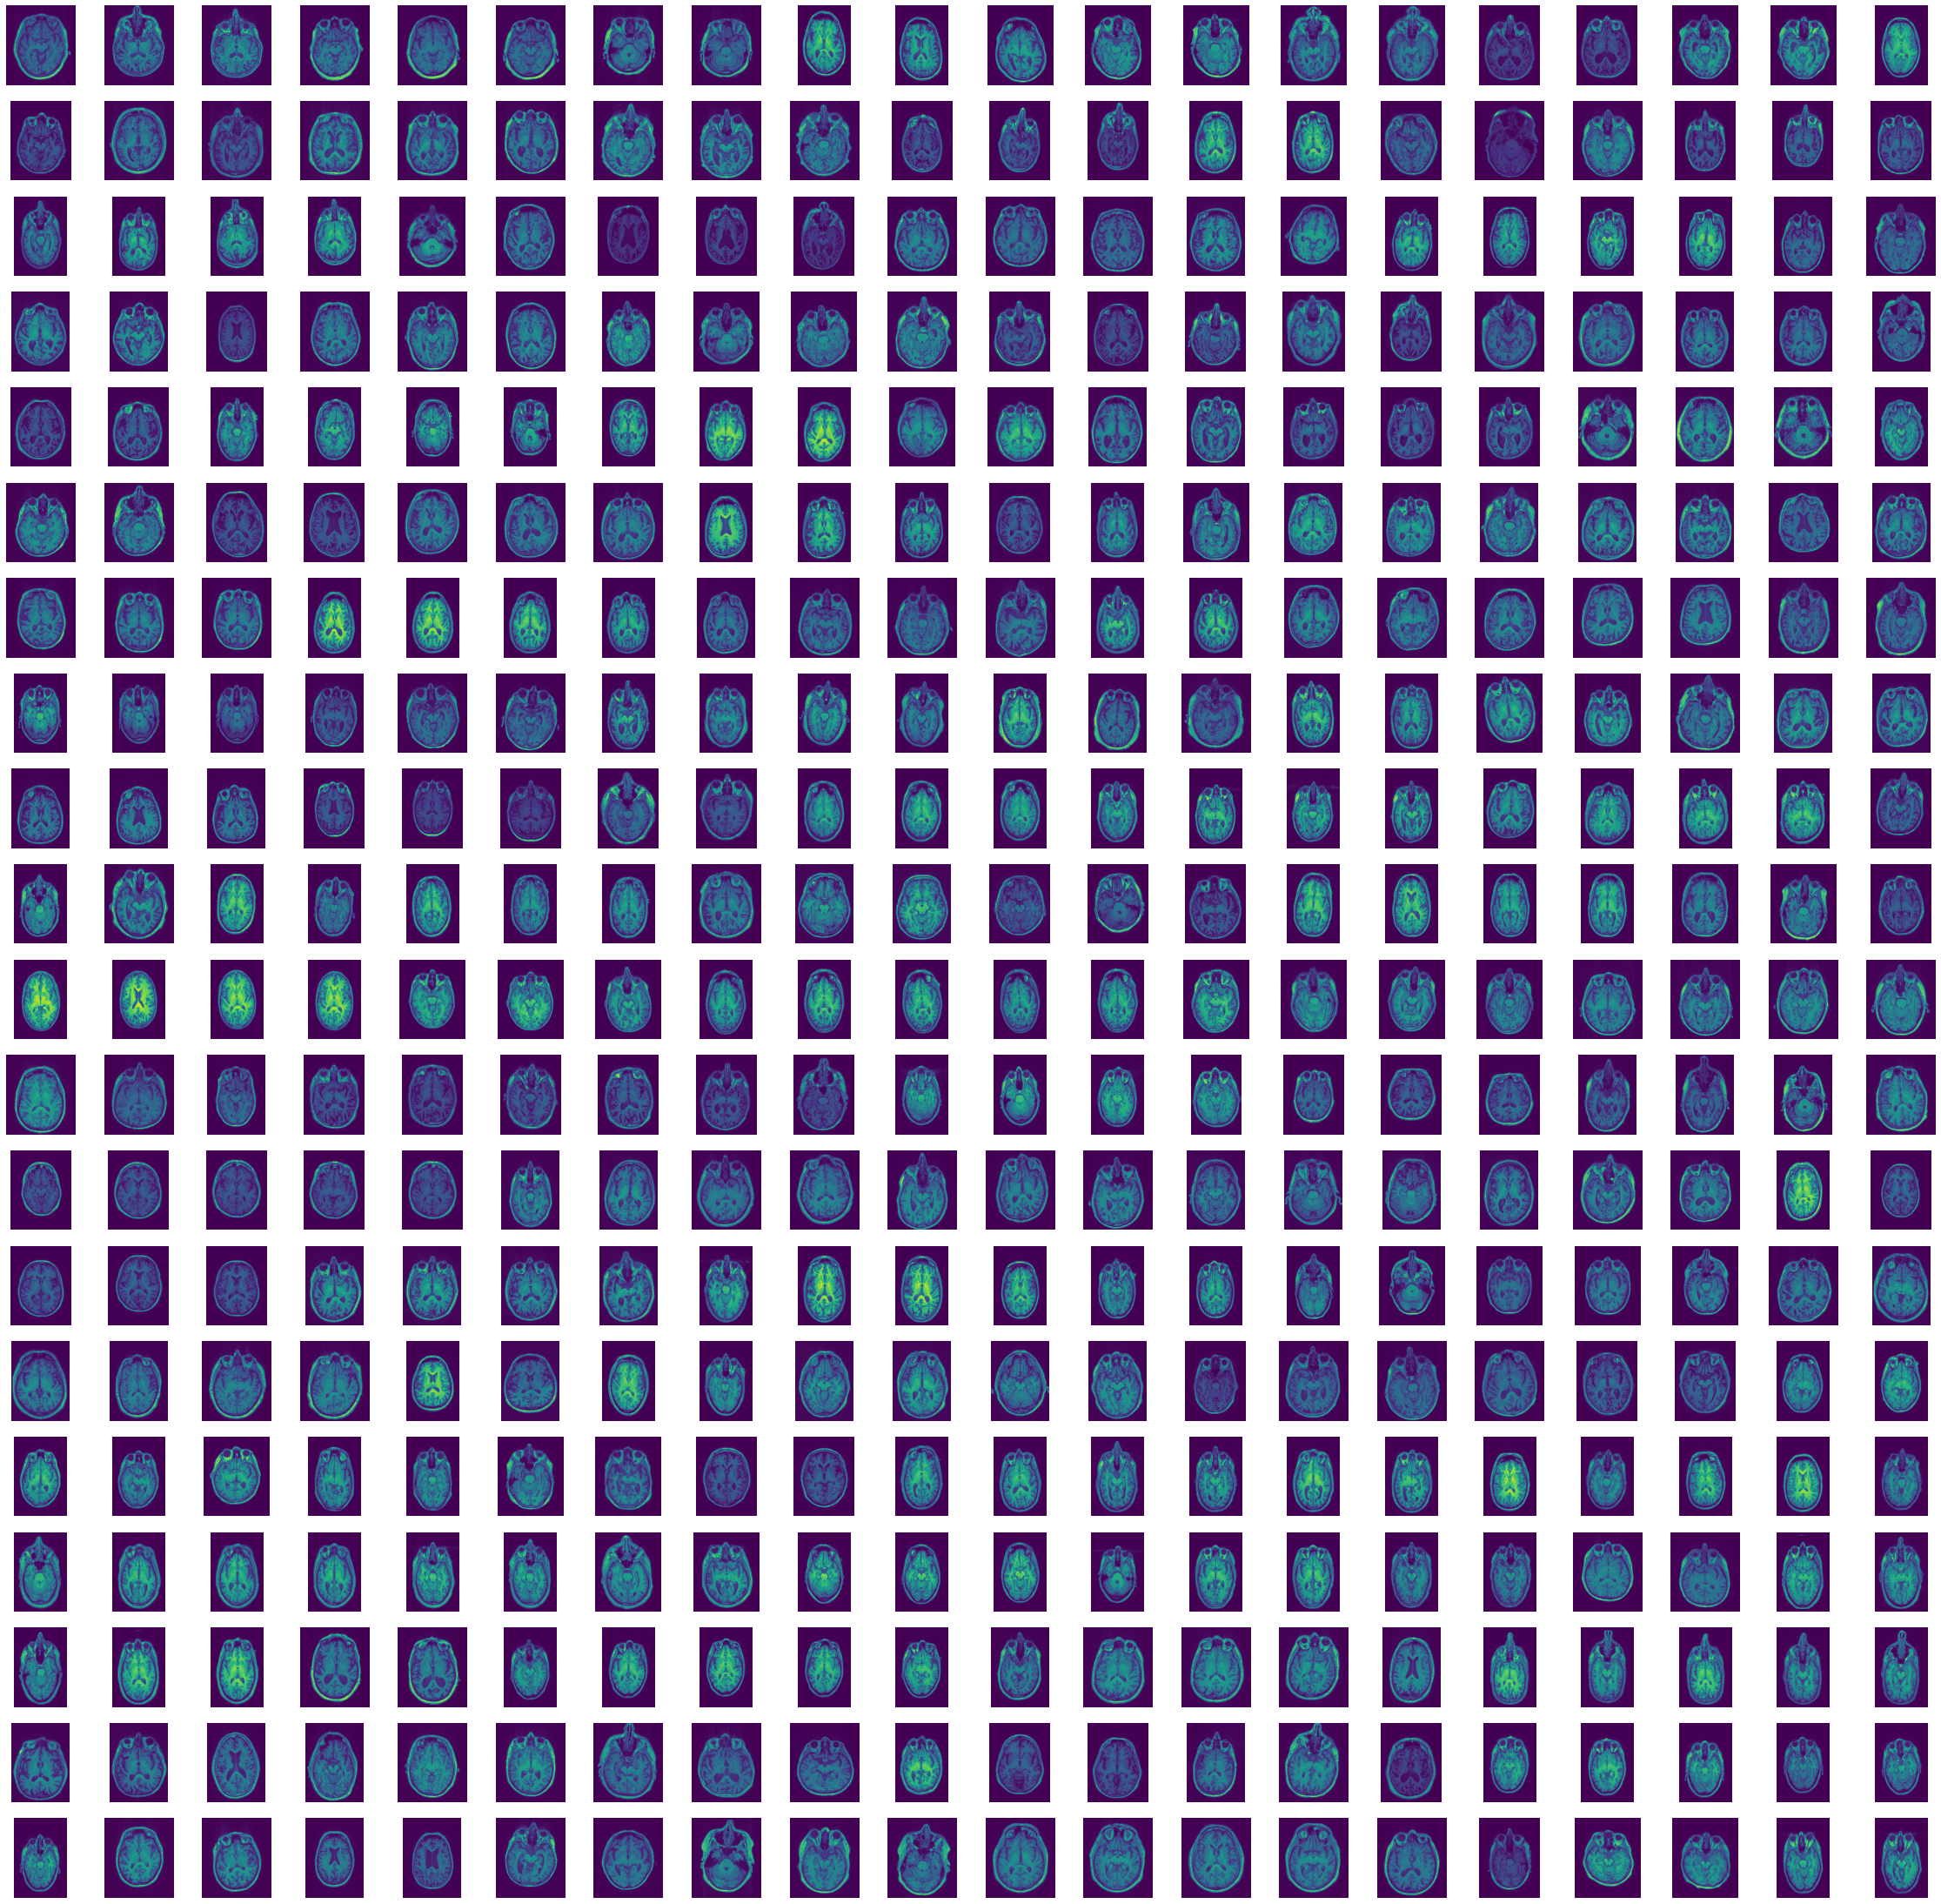

In [33]:
fig, ax = plt.subplots(20,20,figsize=(40,40))
j = 0
k = 0 
for i in range(len(few_files)):
    image = nib.load(few_files[i]).get_fdata()
    image = image[:,:,np.int32(image.shape[2] / 2)]
    ax_image = np.squeeze(image)
    ax_image = np.rot90(ax_image,1)
    ax[k,j].imshow(ax_image)
    ax[k,j].title(i)
    ax[k,j].axis('off')
    if j == 19:
        k += 1
    j += 1
    if j != 0 and j % 20 == 0:
        j = 0
plt.savefig('qa_montage1.png')

In [11]:
root_src = "/nfs2/harmonization/BIDS/ADNI_tmp"
root_out = "/nfs2/harmonization/BIDS/ADNI_tmp/derivatives/N4BiasFieldCorrection"
project = 'ADNI_tmp'

T1s = []
for files in glob.glob(root_src +'/*/*/anat/*.nii.gz'):
    T1s.append(files)

In [14]:
T1s[1]

'/nfs2/harmonization/BIDS/ADNI_tmp/sub-4189/ses-adni2year2scanner136/anat/sub-4189_ses-adni2year2scanner136_T1w.nii.gz'

In [45]:
from tqdm import tqdm

In [48]:
out_file

'/nfs2/harmonization/BIDS/ADNI_tmp/derivatives/N4BiasFieldCorrection/sub-4189/ses-adni2year2scanner136/anat/sub-4189_ses-adni2year2scanner136_T1w.nii.gz'

In [46]:
for T1 in tqdm(T1s):
    # Output file for N4 bias correction
    out_file = root_out + T1.split(project)[1]

    # Create the output derivatives folder
    out_folder = root_out + '/' + out_file.split('/')[7] + '/' + out_file.split('/')[8] + '/anat'
    if not os.path.exists(out_folder):
        print(' dir ')
        os.makedirs(out_folder)

        
    # N4 bias correction
    print("Running N4BiasFieldCorrection" + T1)
    bashCommand = "N4BiasFieldCorrection -d 3 -i " + T1 + " -o " + out_file
    process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
    output, error = process.communicate()
    print("Written to " + out_file)

100%|██████████| 1905/1905 [00:00<00:00, 12693.76it/s]

Running N4BiasFieldCorrection/nfs2/harmonization/BIDS/ADNI_tmp/sub-4189/ses-adni2month6scanner136/anat/sub-4189_ses-adni2month6scanner136_T1w.nii.gz
Running N4BiasFieldCorrection/nfs2/harmonization/BIDS/ADNI_tmp/sub-4189/ses-adni2year2scanner136/anat/sub-4189_ses-adni2year2scanner136_T1w.nii.gz
Running N4BiasFieldCorrection/nfs2/harmonization/BIDS/ADNI_tmp/sub-4084/ses-adni3year2scanner024/anat/sub-4084_ses-adni3year2scanner024_T1w.nii.gz
Running N4BiasFieldCorrection/nfs2/harmonization/BIDS/ADNI_tmp/sub-4084/ses-adni3baselinescanner024/anat/sub-4084_ses-adni3baselinescanner024_T1w.nii.gz
Running N4BiasFieldCorrection/nfs2/harmonization/BIDS/ADNI_tmp/sub-4520/ses-adni3baselinescanner137/anat/sub-4520_ses-adni3baselinescanner137_T1w.nii.gz
Running N4BiasFieldCorrection/nfs2/harmonization/BIDS/ADNI_tmp/sub-4520/ses-adni3year3scanner137/anat/sub-4520_ses-adni3year3scanner137_T1w.nii.gz
Running N4BiasFieldCorrection/nfs2/harmonization/BIDS/ADNI_tmp/sub-4520/ses-adni3year2scanner137/anat/su

In [44]:
T1 = T1s[1]
# Output file
out_file = root_out + T1.split(project)[1]

# Create the output derivatives folder
out_folder = root_out + '/' + out_file.split('/')[7] + '/' + out_file.split('/')[8] + '/anat'
if not os.path.exists(out_folder):
    print(' dir ')
    os.makedirs(out_folder)

    
# N4 bias correction
print("Running N4BiasFieldCorrection" + T1)
bashCommand = "N4BiasFieldCorrection -d 3 -i " + T1 + " -o " + out_file
print(bashCommand)
process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
output, error = process.communicate()
print("Written to " + out_file)

 dir 
Running N4BiasFieldCorrection/nfs2/harmonization/BIDS/ADNI_tmp/sub-4189/ses-adni2year2scanner136/anat/sub-4189_ses-adni2year2scanner136_T1w.nii.gz
N4BiasFieldCorrection -d 3 -i /nfs2/harmonization/BIDS/ADNI_tmp/sub-4189/ses-adni2year2scanner136/anat/sub-4189_ses-adni2year2scanner136_T1w.nii.gz -o /nfs2/harmonization/BIDS/ADNI_tmp/derivatives/N4BiasFieldCorrection/sub-4189/ses-adni2year2scanner136/anat/sub-4189_ses-adni2year2scanner136_T1w.nii.gz
Written to /nfs2/harmonization/BIDS/ADNI_tmp/derivatives/N4BiasFieldCorrection/sub-4189/ses-adni2year2scanner136/anat/sub-4189_ses-adni2year2scanner136_T1w.nii.gz


In [35]:
if not os.path.exists(out_folder+'/anat'):
    print(' dir ')
    os.makedirs(out_folder+'/anat')

 dir 


In [43]:
out_folder

'/nfs2/harmonization/BIDS/ADNI_tmp/derivatives/N4BiasFieldCorrectionsub-4189/ses-adni2year2scanner136/anat'